In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Step 1: Descriptive Statistics

In [10]:

# Combine all years into a single DataFrame
df_list = []
for file in file_paths:
    file_path = os.path.join(base_folder, file)
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
    except ValueError as e:
        print(f"Error reading {file_path}: {e}")


if df_list:
    tfl_data = pd.concat(df_list, ignore_index=True)

    # Calculate summary statistics
    entry_summary = tfl_data['EntryTapCount'].describe()
    exit_summary = tfl_data['ExitTapCount'].describe()

    print("EntryTapCount Summary Statistics:")
    print(entry_summary)
    print("\nExitTapCount Summary Statistics:")
    print(exit_summary)
else:
    print("No valid data files were loaded.")

EntryTapCount Summary Statistics:
count    183743.000000
mean      17505.743402
std       20951.378553
min           0.000000
25%        4587.000000
50%        9764.000000
75%       21429.000000
max      151035.000000
Name: EntryTapCount, dtype: float64

ExitTapCount Summary Statistics:
count    183743.000000
mean      17995.779676
std       21736.364481
min           0.000000
25%        4582.000000
50%        9884.000000
75%       22129.500000
max      180538.000000
Name: ExitTapCount, dtype: float64


# Step 2: Visualizations

EntryTapCount Summary Statistics:
count    183743.000000
mean      17505.743402
std       20951.378553
min           0.000000
25%        4587.000000
50%        9764.000000
75%       21429.000000
max      151035.000000
Name: EntryTapCount, dtype: float64

ExitTapCount Summary Statistics:
count    183743.000000
mean      17995.779676
std       21736.364481
min           0.000000
25%        4582.000000
50%        9884.000000
75%       22129.500000
max      180538.000000
Name: ExitTapCount, dtype: float64


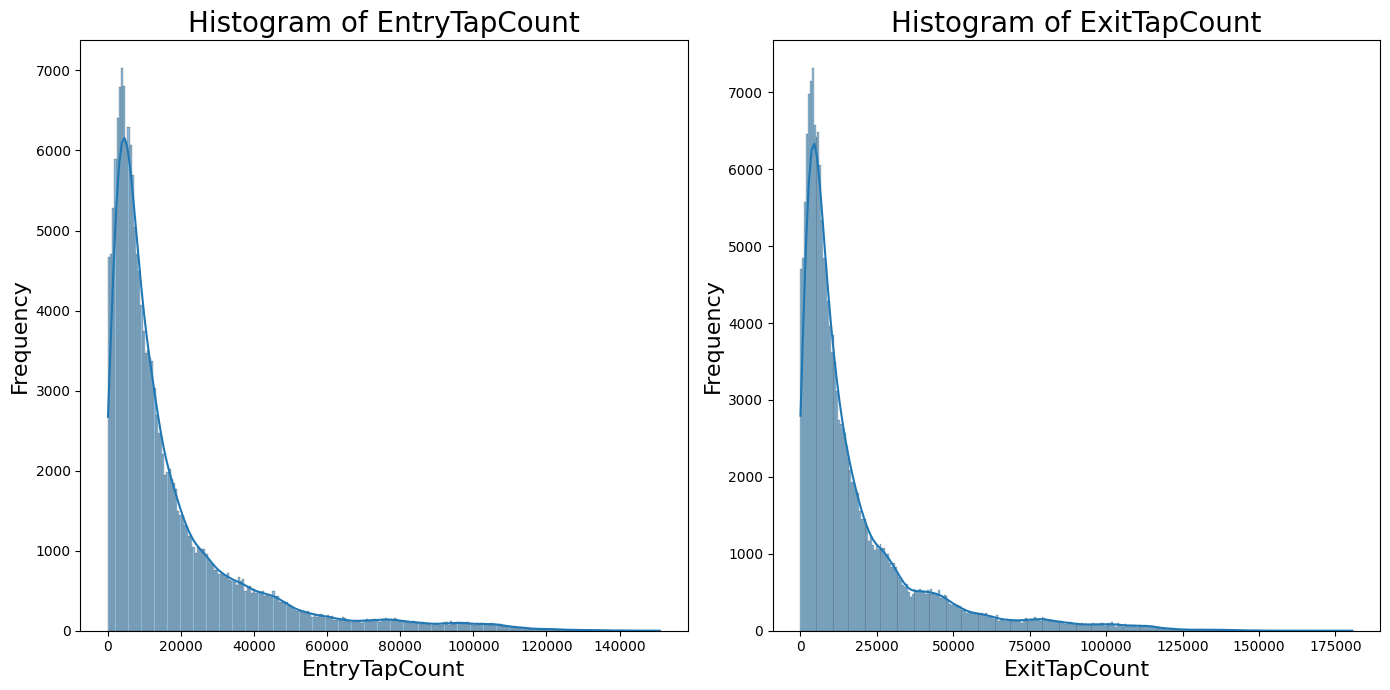

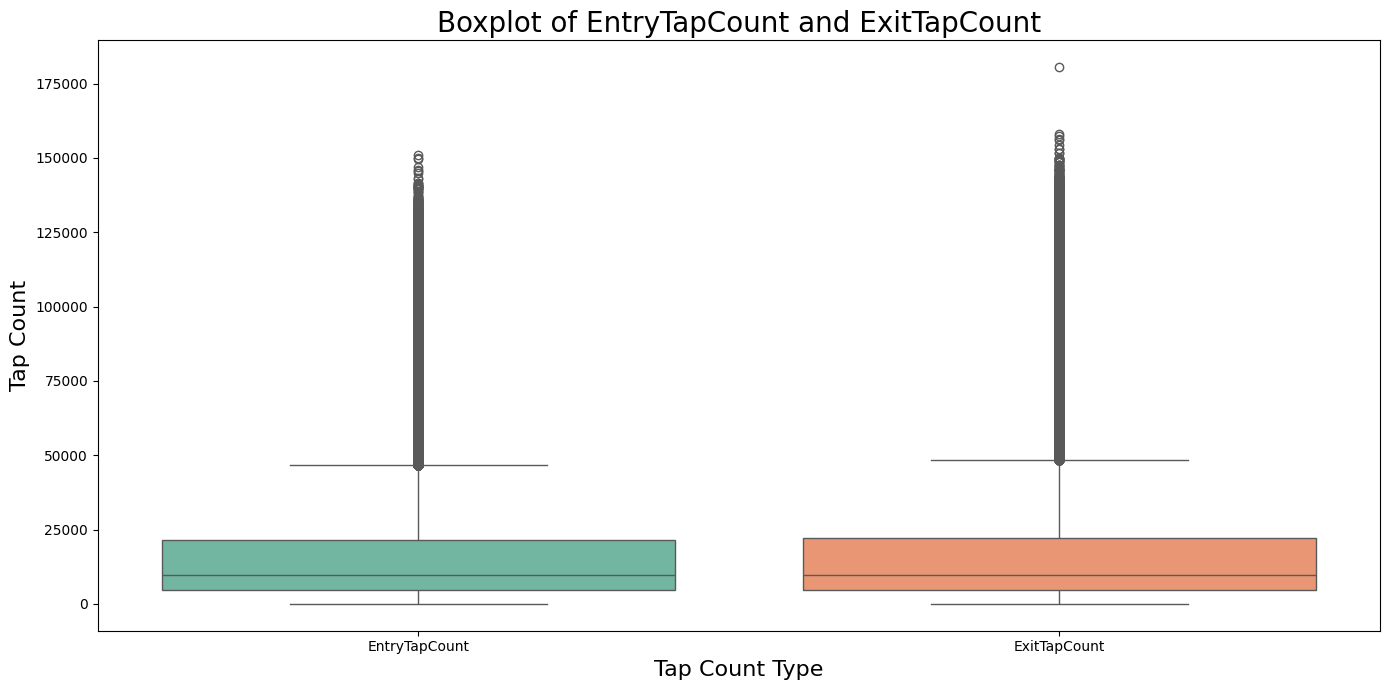

In [12]:
if df_list:
    tfl_data = pd.concat(df_list, ignore_index=True)

    # Calculate summary statistics
    entry_summary = tfl_data['EntryTapCount'].describe()
    exit_summary = tfl_data['ExitTapCount'].describe()

    print("EntryTapCount Summary Statistics:")
    print(entry_summary)
    print("\nExitTapCount Summary Statistics:")
    print(exit_summary)

    # 可视化数据分布

    # 直方图
    plt.figure(figsize=(14, 7))
    
    # EntryTapCount histogram
    plt.subplot(1, 2, 1)
    sns.histplot(tfl_data['EntryTapCount'], kde=True)
    plt.title('Histogram of EntryTapCount', fontsize=20)
    plt.xlabel('EntryTapCount', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    
    # ExitTapCount histogram
    plt.subplot(1, 2, 2)
    sns.histplot(tfl_data['ExitTapCount'], kde=True)
    plt.title('Histogram of ExitTapCount', fontsize=20)
    plt.xlabel('ExitTapCount', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    
    plt.tight_layout()
    plt.show()

    # 箱线图
    plt.figure(figsize=(14, 7))
    
    # Boxplot for EntryTapCount and ExitTapCount
    sns.boxplot(data=tfl_data[['EntryTapCount', 'ExitTapCount']], palette="Set2")
    plt.title('Boxplot of EntryTapCount and ExitTapCount', fontsize=20)
    plt.xlabel('Tap Count Type', fontsize=16)
    plt.ylabel('Tap Count', fontsize=16)
    plt.xticks(ticks=[0, 1], labels=['EntryTapCount', 'ExitTapCount'])
    
    plt.tight_layout()
    plt.show()
else:
    print("No valid data files were loaded.")

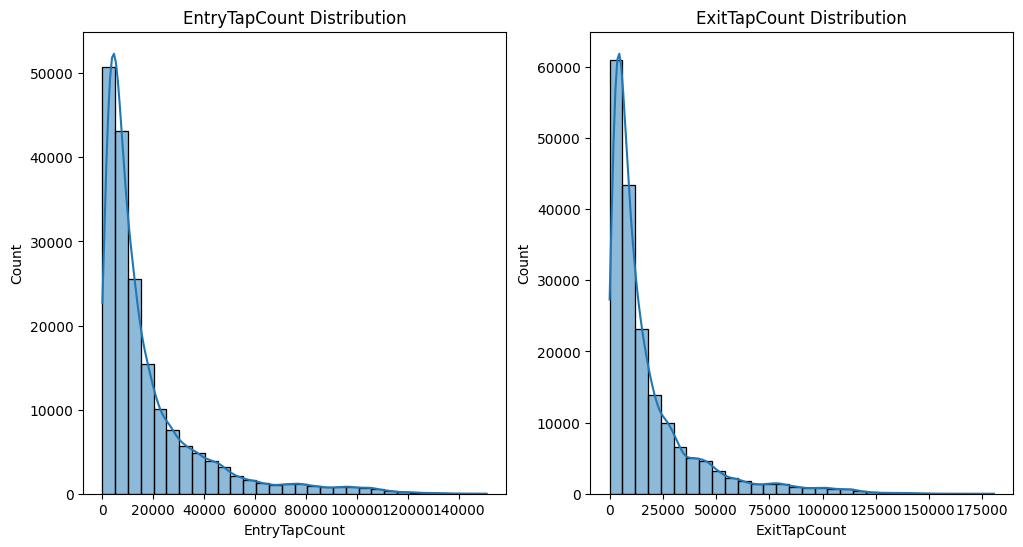

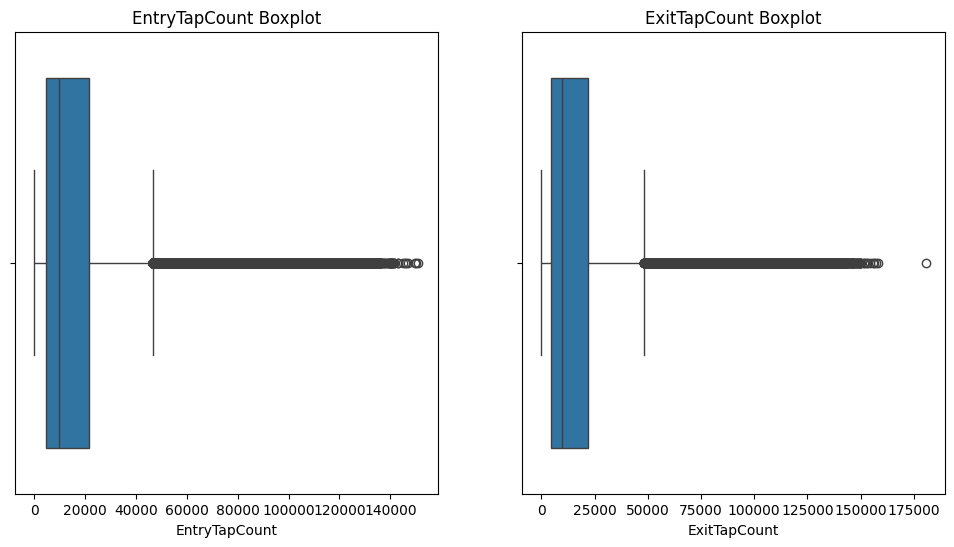

In [4]:

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(tfl_data['EntryTapCount'], bins=30, kde=True)
plt.title('EntryTapCount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(tfl_data['ExitTapCount'], bins=30, kde=True)
plt.title('ExitTapCount Distribution')
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=tfl_data['EntryTapCount'])
plt.title('EntryTapCount Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=tfl_data['ExitTapCount'])
plt.title('ExitTapCount Boxplot')
plt.show()


In [5]:
# Convert 'ReadingDateTime' to datetime if not already done
tfl_data['ReadingDateTime'] = pd.to_datetime(tfl_data['ReadingDateTime'])

# Plot time series
plt.figure(figsize=(14, 7))
tfl_data.set_index('ReadingDateTime')[['EntryTapCount', 'ExitTapCount']].plot()
plt.title('Time Series of Entry and Exit Tap Counts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['EntryTapCount', 'ExitTapCount'])
plt.show()


KeyError: 'ReadingDateTime'

In [6]:
# Convert 'ReadingDateTime' to datetime if not already done
tfl_data['ReadingDateTime'] = pd.to_datetime(tfl_data['ReadingDateTime'])

# Plot time series
plt.figure(figsize=(14, 7))
tfl_data.set_index('ReadingDateTime')[['EntryTapCount', 'ExitTapCount']].plot()
plt.title('Time Series of Entry and Exit Tap Counts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['EntryTapCount', 'ExitTapCount'])
plt.show()


KeyError: 'ReadingDateTime'